# PCA Visualization 
<h2>Assignment - Machine Learning Lab (CSE 4112) </h2>
<h3>Submitted by - Ohida Binte Amin (1507091)</h3>

In [1]:
import itertools

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

In [2]:
x_train = pd.read_csv(filepath_or_buffer="../input/train.csv",index_col=0, sep=',')

y_train = x_train["TARGET"]
x_train = x_train.drop(labels="TARGET", axis=1)
classes = np.sort(np.unique(y_train))
X_std = StandardScaler().fit_transform(x_train)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [3]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# print('Eigenvectors \n%s' %eig_vecs)
# print('\nEigenvalues \n%s' %eig_vals)

In [4]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [5]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(369,1), 
                      eig_pairs[1][1].reshape(369,1)))

#print('Matrix W:\n', matrix_w)

In [6]:
transformed = X_std.dot(matrix_w)

/opt/conda/lib/python3.6/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


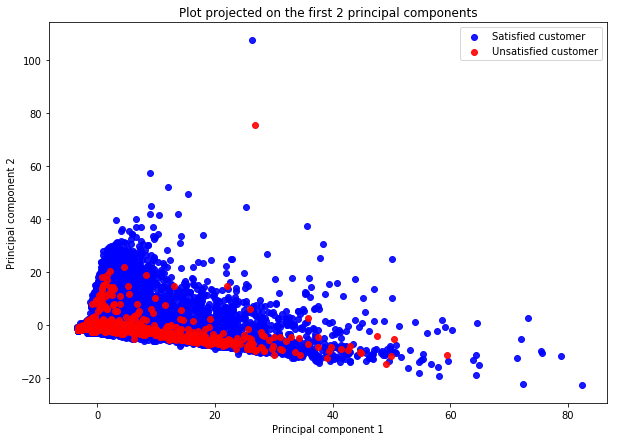

In [7]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
colors = ['blue', 'red']
markers = ["o", "o"]
labels = ["Satisfied customer", "Unsatisfied customer"]

for class_ix, marker, color, label in zip(
        classes, markers, colors, labels):
    ax.scatter(transformed[np.where(y_train == class_ix), 0],
               transformed[np.where(y_train == class_ix), 1],
               marker=marker, color=color,
               linewidth='1', alpha=0.9, label=label)
    ax.legend(loc='best')
    plt.title(
        "Plot projected on the first 2 principal components")
    plt.xlabel("Principal component 1")
    plt.ylabel("Principal component 2")
plt.show()